# Introduction to Physical Oceanography 2021 - Tutorial

In this tutorial we will go over the content of the lecture and solve some problems in order to get a better understanding of the material. Therefore it is helpful to do some calculations and look at some graphs. With python, it is possible to quickly some of these graphs on your own. As this lecture series is not meant to be a programming course, the amount of coding will remain little. However, if you have never done data analysis (or coding) with a programming language such as Python or Matlab before, this tutorial will give you a first impression. Below, you will find a quick summary of the most important things for this class.
In order to go through this file, click on this box and execute it with SHIFT+ENTER. The appearance of this text will change and the blue box will jump to the next box. By repeatedly pressing SHIFT+ENTER you will get through the file.

### author of this file:
Eike Köhn
### purpose of this file: 
Introduction to Python in Jupyter notebooks

## Introduction to Python


There are many, many, many introductions to Python online. Under the following links you will be directed to overviews of the most relevant things for this class:

* Variables, Math, and Data Structures (https://earth-env-data-science.github.io/lectures/core_python/python_fundamentals.html)

* The numpy package (https://earth-env-data-science.github.io/lectures/basic_scipy/numpy_and_matplotlib.html)

* Making figures (https://earth-env-data-science.github.io/lectures/basic_scipy/more_matplotlib.html)

## Exercise

Now, based on what you have learned under the following links, you can test your knowledge by doing the following:
* Create the variable mylist containing a list of 20 times iterating 0s and 1s, i.e. 0,1,0,1,0,1...
* Create a numpy array containing the first 20 elements of the Fibonacci series beginning with 0,1,... 
* Plot in one graph the sin and cos function defined between -2pi and 2pi
* Plot a map of the global ocean mean Sea Surface Temperature (SST) for February and the annual average (i.e. averaged over all months) and the difference between the two

In [2]:
### HERE GOES THE CALCULATION FOR mylist
mylist = [0,1]*20
print(mylist)

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


In [8]:
### HERE GOES THE CALCULATION OF THE FIBONACCI SERIES
fib = [0,1]
totnum = 20
iterations = totnum-len(fib)
for i in range(iterations):
    fib.append(fib[-2]+fib[-1])
print(fib)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


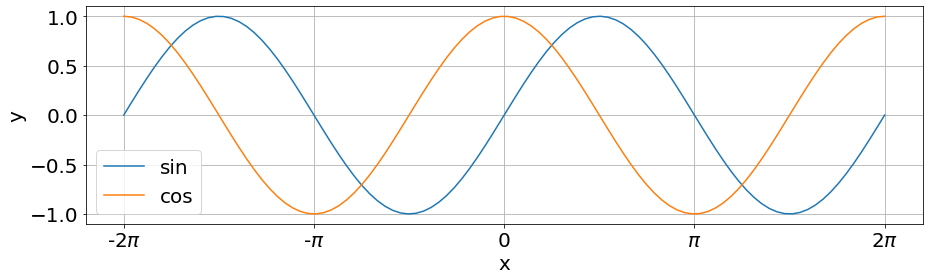

In [28]:
### HERE GOES THE CODE FOR PLOTTING THE SIN AND COS FUNCTIONS
import numpy as np                             # load the numpy package
import matplotlib.pyplot as plt                # load the plotting package
x = np.linspace(-2*np.pi,2*np.pi,100)          # set up the x vector 
ysin = np.sin(x)                               # define the sin function
ycos = np.cos(x)                               # define the cos function
plt.rcParams['font.size']=20                   # set the fontsize in the plot
plt.subplots(figsize=(15,4))                   # initialize the plot and set its size 
plt.plot(x,ysin,label='sin')                   # plot the sin function and set its legend label
plt.plot(x,ycos,label='cos')                   # plot the cos function and set its legend label 
plt.xticks([-2*np.pi,-1*np.pi,0,np.pi,2*np.pi],[r'-2$\pi$',r'-$\pi$',r'0',r'$\pi$',r'2$\pi$'])  # define where the ticks should be set on the xaxis and what the according tick-labeling should be
plt.xlabel('x')                                # set the x-label
plt.ylabel('y')                                # set the y-label
plt.grid()                                     # turn on the grid
plt.legend()                                   # include the legend which uses the labels given when plotting the sin and cos functions
plt.show()                                     # finally generate the plot

In [53]:
### HERE GOES THE CODE FOR PLOTTING THE GLOBAL SST
import xarray as xr
import numpy as np  # not needed because this is already loaded for previous task, but just for completeness' sake
filename = 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2/sst.ltm.1981-2010.nc'
fn = xr.open_dataset(filename,decode_times=False)
sst = fn.sst.values # this line takes a moment

#... TAKE IT FROM HERE
print('This is what the file looks like')
print(fn)                 # first we have a look at the file. It contains the data variable sst 
print('The shape of the sst variable is: ')
sstshape = np.shape(sst)  
print(sstshape)

This is what the file looks like
<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 12)
Coordinates:
  * time     (time) float64 -6.571e+05 -6.57e+05 ... -6.568e+05 -6.567e+05
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Data variables:
    sst      (time, lat, lon) float32 -1.79 -1.79 -1.79 -1.79 ... nan nan nan
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    creation_date:  Thu Sep  8 15:41:50 MDT 2011
    history:        Created by NOAA-CIRES Climate Diagnostics Center (DRM) fr...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/
The shape of the sst variable is: 
(12, 180, 360)


Consistently both fn and sst show that the first dimension is the time dimension, the second one is the latitute and the third dimension is longitude.

We now want to calculate the annual mean, extract the February SST values and calculate the difference.

In [54]:
print('To calculate the annual mean, we have to average across months, i.e. the time dimension (i.e. dimension 0):')
sst_annual_mean = np.mean(sst,axis=0)
print('The shape of the sst_annual_mean variable is:')
print(np.shape(sst_annual_mean))

print('Now we want to extract the SST for February, i.e. the second month of the year. Beware of pythonic indexing!')
sst_february = sst[1,:,:]   # here we take the 2nd entry along the time variable. But because python indexing starts with 0, the second entry is reached with the number 1
print('The shape of the sst_february variable is:')
print(np.shape(sst_february))

print('Now we calculate the February anomaly for the SST.')
sst_feb_anom = sst_february - sst_annual_mean

To calculate the annual mean, we have to average across months, i.e. the time dimension (i.e. dimension 0):
The shape of the sst_annual_mean variable is:
(180, 360)
Now we want to extract the SST for February, i.e. the second month of the year. Beware of pythonic indexing!
The shape of the sst_february variable is:
(180, 360)
Now we calculate the February anomaly for the SST.


Okay, so now we have calculated everything we need to make the plot.

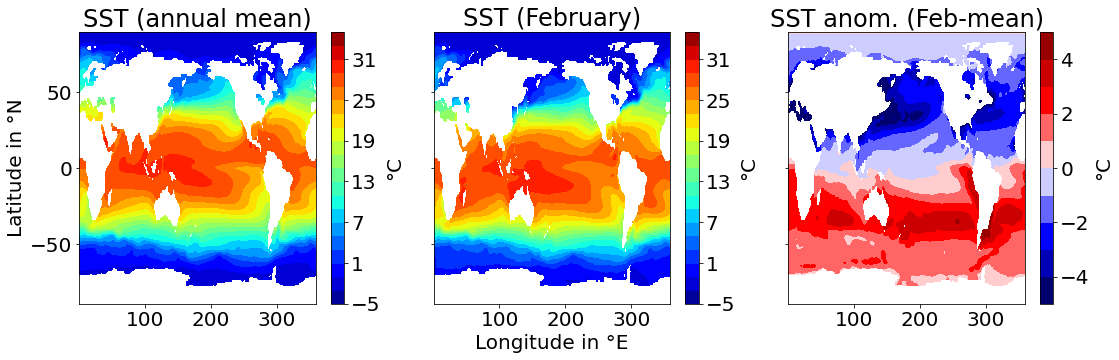

In [70]:
import matplotlib.pyplot as plt # not needed because this is already loaded for previous task, but just for completeness' sake
levels_sst = np.linspace(-5,35,21)
levels_sst_anom = np.linspace(-5,5,11)
fig, ax = plt.subplots(1,3,figsize=(18,5),sharey=True) # set up figure with three subplots (1 row, 3 columns) and define the figure size
c0 = ax[0].contourf(fn.lon,fn.lat,sst_annual_mean,cmap='jet',levels=levels_sst)
c1 = ax[1].contourf(fn.lon,fn.lat,sst_february,cmap='jet',levels=levels_sst)
c2 = ax[2].contourf(fn.lon,fn.lat,sst_feb_anom,cmap='seismic',levels=levels_sst_anom)
plt.colorbar(c0,ax=ax[0],label='°C')
plt.colorbar(c1,ax=ax[1],label='°C')
plt.colorbar(c2,ax=ax[2],label='°C')
ax[1].set_xlabel('Longitude in °E')
ax[0].set_ylabel('Latitude in °N')
titles = ['SST (annual mean)', 'SST (February)', 'SST anom. (Feb-mean)']
for i in range(len(titles)):
    ax[i].set_title(titles[i])
plt.show()